#Content
1.   Library (Required)
2.   EMNIST Dataset
> 2.1 Run the Training \
> 2.2 Run the Inference \
> 2.3 Demo \
1.   SVHN Dataset
> 3.1 Run the Training \
> 3.2 Run the Inference \
> 3.3 Demo \
2.   Other Dataset
> 4.1 Run the Training \
> 4.2 Run the Inference \
> 4.3 Demo \









# 1. Library (Required)
Run this code parts is compulsory

In [1]:
import numpy as np, numpy.random

np.random.dirichlet(np.ones(10)*1000.,size=1)

array([[0.09617608, 0.1043546 , 0.09668223, 0.10111669, 0.09948076,
        0.09738855, 0.10481861, 0.10217982, 0.09979067, 0.09801197]])

In [2]:
#delete these row if will not use COLAB
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!pip install thop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 2. EMNIST Dataset

## 2.0 Grouper

In [4]:
%cd /content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/EMNIST/SoftmaxOutput/

/content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/EMNIST/SoftmaxOutput


In [5]:
!python grouper.py

root:
[0, 13, 24, 36, 2, 35, 26, 44, 8, 11, 41, 9]
[1, 18, 21, 19]
[3]
[4, 17, 30, 34, 10, 31, 33, 20, 27, 42, 37, 6, 16]
[5, 28]
[7]
[12, 39]
[14]
[15, 40, 46, 29]
[22, 43]
[23, 32]
[25]
[38]
[45]


0:
[0, 24]
[13]
[36]
[2, 35]
[26]
[44, 41, 9, 8]
[11]


1:
[1, 18, 21]
[19]


3:
[4, 34]
[17]
[30]
[10]
[31]
[33]
[20]
[27]
[42]
[37]
[6]
[16]


8:
[15, 40]
[46]
[29]


## 2.1 Run the Training

In [4]:
%cd /content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/EMNIST/Train/

/content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/EMNIST/Train


In [ ]:
!python emnist.py

100% 561753746/561753746 [00:26<00:00, 21354012.42it/s]
Extracting dataEMNIST/EMNIST/raw/gzip.zip to dataEMNIST/EMNIST/raw
 1126/1126 [================================================================================>]  Step: 78ms | Tot: 23s52ms | Loss: 0.0004 | Acc: 80.378% (90486/112575)
Epoch:  1 
Train:  0.8037841439040639
Val:  0.8488888888888889
checkpoint saved
 1126/1126 [================================================================================>]  Step: 66ms | Tot: 25s12ms | Loss: 0.0003 | Acc: 86.492% (97368/112575)
Epoch:  2 
Train:  0.8649167221852099
Val:  0.8488888888888889
 1126/1126 [================================================================================>]  Step: 62ms | Tot: 22s982ms | Loss: 0.0002 | Acc: 87.760% (98796/112575)
Epoch:  3 
Train:  0.877601598934044
Val:  0.8577777777777778
checkpoint saved
 1126/1126 [================================================================================>]  Step: 64ms | Tot: 23s20ms | Loss: 0.0003 | Acc: 88.275% (

In [ ]:
!python emnist_0.py

Traceback (most recent call last):
  File "emnist_0.py", line 434, in <module>
    main()
  File "emnist_0.py", line 416, in main
    model = model_root().to(torch.device("cuda"))
  File "/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py", line 987, in to
    return self._apply(convert)
  File "/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py", line 639, in _apply
    module._apply(fn)
  File "/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py", line 639, in _apply
    module._apply(fn)
  File "/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py", line 662, in _apply
    param_applied = fn(param)
  File "/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py", line 985, in convert
    return t.to(device, dtype if t.is_floating_point() or t.is_complex() else None, non_blocking)
  File "/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py", line 229, in _lazy_init
    torch._C._cuda_init()
RuntimeError: No 

In [ ]:
!python emnist_root.py

Traceback (most recent call last):
  File "emnist_root.py", line 269, in <module>
    main()
  File "emnist_root.py", line 255, in main
    model.load_state_dict(torch.load('/content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/EMNIST/Train/emnist_root.py'))
  File "/usr/local/lib/python3.8/dist-packages/torch/serialization.py", line 795, in load
    return _legacy_load(opened_file, map_location, pickle_module, **pickle_load_args)
  File "/usr/local/lib/python3.8/dist-packages/torch/serialization.py", line 1002, in _legacy_load
    magic_number = pickle_module.load(f, **pickle_load_args)
_pickle.UnpicklingError: could not find MARK


In [ ]:
!python emnist_root.py

##2.2 Run the Inference

In [ ]:
%cd /content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/EMNIST/Test/
!python test_emnist.py

/content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/EMNIST/Test
Val:  0.913386524822695


##2.3 Demo

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision import models
from torch.autograd import Variable
from torch.utils.data.sampler import SubsetRandomSampler
import time
import numpy as np
import shutil
import os
import argparse
from PIL import Image
import matplotlib.pyplot as plt
import glob
import os, random

In [ ]:
m = nn.Softmax()

cfg = {
    '0_0': [32, 48, 'M'],
    '0_3': [32, 32, 'M'],
    '0_5': [32, 32, 'M'],
    '0': [16, 32, 'M', 'D'],
    '1': [16, 32, 'M', 'D'],
    '1_0': [32, 64, 'M'],
    'root': [16, 'M', 16, 'D'],
    '3': [16, 32, 'M'],
    '3_0': [32, 32, 'M'],
    '4': [16, 32,'M'],
    '6': [16, 32, 'M'],
    '8': [16, 32, 'M'],
    '8_0': [32, 32, 'M'],
    '9': [16, 32, 'M'],
    '10': [16, 32, 'M'],
}

In [ ]:
class model(nn.Module):
    def __init__(self, size):
        super(model, self).__init__()
        self.features = self._make_layers(cfg[size])
        self.classifier = nn.Sequential(
                        nn.Linear(16*14*14, 14),
                )

    def forward(self, x):
        y = self.features(x)
        x = y.view(y.size(0), -1)
        out = self.classifier(x)
        return y,out

    def _make_layers(self, cfg):
        layers = []
        in_channels = 1
        for x in cfg:
            if x == 'D':
                layers += [nn.Dropout()]
            elif x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1), nn.BatchNorm2d(x), nn.ReLU(inplace=True)]
                in_channels = x
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers)

def model_root():
    return model('root')

class mod_zero(nn.Module):
    def __init__(self, size):
        super(mod_zero, self).__init__()
        self.features = self._make_layers(cfg[size], 16)
        self.classifier = nn.Sequential(
                        nn.Linear(32*7*7, 8),
                )

    def forward(self, x):
        y = self.features(x)
        x = y.view(y.size(0), -1)
        out = self.classifier(x)
        return y,out

    def _make_layers(self, cfg, channels = 3):
        layers = []
        in_channels = channels
        for x in cfg:
            if x == 'D':
                layers += [nn.Dropout()]
            elif x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1), nn.BatchNorm2d(x), nn.ReLU(inplace=True)]
                in_channels = x
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers)

def model_0():
    return mod_zero('0')


class mod_zero_three(nn.Module):
    def __init__(self, size):
        super(mod_zero_three, self).__init__()
        self.features = self._make_layers(cfg[size], 32)
        self.classifier = nn.Sequential(
                        nn.Linear(32*3*3, 2),
                )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        out = self.classifier(x)
        return x,out

    def _make_layers(self, cfg, channels = 3):
        layers = []
        in_channels = channels
        for x in cfg:
            if x == 'D':
                layers += [nn.Dropout()]
            elif x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1), nn.BatchNorm2d(x), nn.ReLU(inplace=True)]
                in_channels = x
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers)

def model_0_3():
    return mod_zero_three('0_3')

class mod_zero_zero(nn.Module):
    def __init__(self, size):
        super(mod_zero_zero, self).__init__()
        self.features = self._make_layers(cfg[size], 32)
        self.classifier = nn.Sequential(
                        nn.Linear(48*3*3, 2),
                )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        out = self.classifier(x)
        return x,out

    def _make_layers(self, cfg, channels = 3):
        layers = []
        in_channels = channels
        for x in cfg:
            if x == 'D':
                layers += [nn.Dropout()]
            elif x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1), nn.BatchNorm2d(x), nn.ReLU(inplace=True)]
                in_channels = x
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers)

def model_0_0():
    return mod_zero_zero('0_0')

class mod_zero_five(nn.Module):
    def __init__(self, size):
        super(mod_zero_five, self).__init__()
        self.features = self._make_layers(cfg[size], 32)
        self.classifier = nn.Sequential(
                        nn.Linear(32*3*3, 3),
                )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        out = self.classifier(x)
        return x,out

    def _make_layers(self, cfg, channels = 3):
        layers = []
        in_channels = channels
        for x in cfg:
            if x == 'D':
                layers += [nn.Dropout()]
            elif x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1), nn.BatchNorm2d(x), nn.ReLU(inplace=True)]
                in_channels = x
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers)

def model_0_5():
    return mod_zero_five('0_5')

class mod_one(nn.Module):
    def __init__(self, size):
        super(mod_one, self).__init__()
        self.features = self._make_layers(cfg[size], 16)
        #self.features_down = self._make_layers(cfg_down[size], 32)
        self.classifier = nn.Sequential(
                        nn.Linear(32*7*7, 2),
                )

    def forward(self, x):
        y = self.features(x)
        #x  = self.features_down(y)
        x = y.view(y.size(0), -1)
        out = self.classifier(x)
        return y,out

    def _make_layers(self, cfg, channels = 3):
        layers = []
        in_channels = channels
        for x in cfg:
            if x == 'D':
                layers += [nn.Dropout()]
            elif x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1), nn.BatchNorm2d(x), nn.ReLU(inplace=True)]
                in_channels = x
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers)

def model_1():
    return mod_one('1')


class mod_one_zero(nn.Module):
    def __init__(self, size):
        super(mod_one_zero, self).__init__()
        self.features = self._make_layers(cfg[size], 32)
        self.classifier = nn.Sequential(
                        nn.Linear(64*3*3, 3),
                )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        out = self.classifier(x)
        return x,out

    def _make_layers(self, cfg, channels = 3):
        layers = []
        in_channels = channels
        for x in cfg:
            if x == 'D':
                layers += [nn.Dropout()]
            elif x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1), nn.BatchNorm2d(x), nn.ReLU(inplace=True)]
                in_channels = x
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers)

def model_1_0():
    return mod_one_zero('1_0')

class mod_three(nn.Module):
    def __init__(self, size):
        super(mod_three, self).__init__()
        self.features = self._make_layers(cfg[size], 16)
        #self.features_down = self._make_layers(cfg_down[size], 32)
        self.classifier = nn.Sequential(
                        nn.Linear(32*7*7, 13),
                )

    def forward(self, x):
        x = self.features(x)
        #x  = self.features_down(y)
        x = x.view(x.size(0), -1)
        out = self.classifier(x)
        return x,out

    def _make_layers(self, cfg, channels = 3):
        layers = []
        in_channels = channels
        for x in cfg:
            if x == 'D':
                layers += [nn.Dropout()]
            elif x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1), nn.BatchNorm2d(x), nn.ReLU(inplace=True)]
                in_channels = x
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers)

def model_3():
    return mod_three('3')


class mod_three_zero(nn.Module):
    def __init__(self, size):
        super(mod_three_zero, self).__init__()
        self.features = self._make_layers(cfg[size], 32)
        self.classifier = nn.Sequential(
                        nn.Linear(32*3*3, 2),
                )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        out = self.classifier(x)
        return x,out

    def _make_layers(self, cfg, channels = 3):
        layers = []
        in_channels = channels
        for x in cfg:
            if x == 'D':
                layers += [nn.Dropout()]
            elif x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1), nn.BatchNorm2d(x), nn.ReLU(inplace=True)]
                in_channels = x
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers)

def model_3_0():
    return mod_three_zero('3_0')

class mod_four(nn.Module):
    def __init__(self, size):
        super(mod_four, self).__init__()
        self.features = self._make_layers(cfg[size], 16)
        #self.features_down = self._make_layers(cfg_down[size], 32)
        self.classifier = nn.Sequential(
                        nn.Linear(32*7*7, 2),
                )

    def forward(self, x):
        x = self.features(x)
        #x  = self.features_down(y)
        x = x.view(x.size(0), -1)
        out = self.classifier(x)
        return x,out

    def _make_layers(self, cfg, channels = 3):
        layers = []
        in_channels = channels
        for x in cfg:
            if x == 'D':
                layers += [nn.Dropout()]
            elif x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1), nn.BatchNorm2d(x), nn.ReLU(inplace=True)]
                in_channels = x
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers)

def model_4():
    return mod_four('4')

class mod_six(nn.Module):
    def __init__(self, size):
        super(mod_six, self).__init__()
        self.features = self._make_layers(cfg[size], 16)
        #self.features_down = self._make_layers(cfg_down[size], 32)
        self.classifier = nn.Sequential(
                        nn.Linear(32*7*7, 2),
                )

    def forward(self, x):
        x = self.features(x)
        #x  = self.features_down(y)
        x = x.view(x.size(0), -1)
        out = self.classifier(x)
        return x,out

    def _make_layers(self, cfg, channels = 3):
        layers = []
        in_channels = channels
        for x in cfg:
            if x == 'D':
                layers += [nn.Dropout()]
            elif x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1), nn.BatchNorm2d(x), nn.ReLU(inplace=True)]
                in_channels = x
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers)

def model_6():
    return mod_six('6')

class mod_eight(nn.Module):
    def __init__(self, size):
        super(mod_eight, self).__init__()
        self.features = self._make_layers(cfg[size], 16)
        #self.features_down = self._make_layers(cfg_down[size], 32)
        self.classifier = nn.Sequential(
                        nn.Linear(32*7*7, 3),
                )

    def forward(self, x):
        y = self.features(x)
        #x  = self.features_down(y)
        x = y.view(y.size(0), -1)
        out = self.classifier(x)
        return y,out

    def _make_layers(self, cfg, channels = 3):
        layers = []
        in_channels = channels
        for x in cfg:
            if x == 'D':
                layers += [nn.Dropout()]
            elif x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1), nn.BatchNorm2d(x), nn.ReLU(inplace=True)]
                in_channels = x
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers)

def model_8():
    return mod_eight('8')

class mod_eight_zero(nn.Module):
    def __init__(self, size):
        super(mod_eight_zero, self).__init__()
        self.features = self._make_layers(cfg[size], 32)
        self.classifier = nn.Sequential(
                        nn.Linear(32*3*3, 2),
                )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        out = self.classifier(x)
        return x,out

    def _make_layers(self, cfg, channels = 3):
        layers = []
        in_channels = channels
        for x in cfg:
            if x == 'D':
                layers += [nn.Dropout()]
            elif x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1), nn.BatchNorm2d(x), nn.ReLU(inplace=True)]
                in_channels = x
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers)

def model_8_0():
    return mod_eight_zero('8_0')

class mod_nine(nn.Module):
    def __init__(self, size):
        super(mod_nine, self).__init__()
        self.features = self._make_layers(cfg[size], 16)
        #self.features_down = self._make_layers(cfg_down[size], 32)
        self.classifier = nn.Sequential(
                        nn.Linear(32*7*7, 2),
                )

    def forward(self, x):
        x = self.features(x)
        #x  = self.features_down(y)
        x = x.view(x.size(0), -1)
        out = self.classifier(x)
        return x,out

    def _make_layers(self, cfg, channels = 3):
        layers = []
        in_channels = channels
        for x in cfg:
            if x == 'D':
                layers += [nn.Dropout()]
            elif x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1), nn.BatchNorm2d(x), nn.ReLU(inplace=True)]
                in_channels = x
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers)

def model_9():
    return mod_nine('9')

class mod_ten(nn.Module):
    def __init__(self, size):
        super(mod_ten, self).__init__()
        self.features = self._make_layers(cfg[size], 16)
        #self.features_down = self._make_layers(cfg_down[size], 32)
        self.classifier = nn.Sequential(
                        nn.Linear(32*7*7, 2),
                )

    def forward(self, x):
        x = self.features(x)
        #x  = self.features_down(y)
        x = x.view(x.size(0), -1)
        out = self.classifier(x)
        return x,out

    def _make_layers(self, cfg, channels = 3):
        layers = []
        in_channels = channels
        for x in cfg:
            if x == 'D':
                layers += [nn.Dropout()]
            elif x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1), nn.BatchNorm2d(x), nn.ReLU(inplace=True)]
                in_channels = x
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers)

def model_10():
    return mod_ten('10')

In [ ]:
leaves = {"root": {2:3, 5:7, 7:14, 11:25, 12:38, 13:45}, "root_0":{1:13,2:36,4:26,6:8,7:11}, "root_0_0": {0:0,1:24},
          "root_0_3": {0:2,1:35}, "root_0_5": {0:44,1:41,2:9}, "root_1": {1:19}, "root_1_0": {0:1,1:18,2:21},
         "root_8": {1:46,2:29}, "root_8_0": {0:15,1:40}, "root_10": {0:23, 1:32},
          "root_3":dict(zip(range(1,12), [17, 30, 10, 31, 33, 20, 27, 42, 37, 6, 16])),
         "root_3_0":{0:4,1:34}, "root_4":{0:5, 1:28}, "root_6":{0:12, 1:39}, "root_9": {0:22, 1:43}, }

def is_leaf(path, output):
    if output in leaves[path].keys():
        return True
    return False

def find_category(path, leaf):
    return leaves[path][leaf]

In [ ]:
models = {"root_0": model_0(), "root_0_0": model_0_0(),
            "root_0_3": model_0_3(), "root_0_5": model_0_5(), "root_1": model_1(), "root_1_0": model_1_0(), 
            "root_8": model_8(), "root_8_0": model_8_0(), "root_10": model_10(),
            "root_3": model_3(), "root_3_0": model_3_0(), "root_4":model_4(), "root_6": model_6(),
            "root_9": model_9()}

model_name = {"root_0":"/content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/EMNIST/Models/emnist_0.pth", "root_0_0": "/content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/EMNIST/Models/emnist_0_0.pth",
            "root_0_3": "/content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/EMNIST/Models/emnist_0_3.pth", "root_0_5": "/content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/EMNIST/Models/emnist_0_5.pth", "root_1": "/content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/EMNIST/Models/emnist_1.pth", "root_1_0": "/content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/EMNIST/Models/emnist_1_0.pth", 
            "root_8": "/content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/EMNIST/Models/emnist_8.pth", "root_8_0": "/content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/EMNIST/Models/emnist_8_0.pth", "root_10": "/content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/EMNIST/Models/emnist_10.pth",
            "root_3":"/content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/EMNIST/Models/emnist_3.pth", "root_3_0":"/content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/EMNIST/Models/emnist_3_0.pth", "root_4":"/content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/EMNIST/Models/emnist_4.pth", "root_6":"/content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/EMNIST/Models/emnist_6.pth",
            "root_9": "/content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/EMNIST/Models/emnist_9.pth" }

def fetch_model(path):
    model = models[path].cuda().eval()
    model.load_state_dict(torch.load(model_name[path]))
    return model
    

In [ ]:
mapper = dict(zip(list(range(0, 47)), [0,1,2,3,4,5,6,7,8,9,'A','B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'd', 'e', 'f', 'g', 'h', 'i', 'n', 'q', 'r', 't',]))
def demo(model, img, device):
    parent = "root"
    path = "root"
    next_data, root_out = model(img.view(1,img.shape[0], img.shape[1], img.shape[2]))
    root_out = root_out.max(1, keepdim=True)[1]
    if is_leaf(path, root_out.item()):
            return mapper[find_category(path, root_out.item())]
    parent = str(root_out.item())
    
    while(1): 
        path = path + "_" + parent
        model = fetch_model(path)
        model = model.eval()
        next_data, model_out = model(next_data)
        model_out = model_out.max(1, keepdim=True)[1]
        if is_leaf(path, model_out.item()):
            return mapper[find_category(path, model_out.item())]
        parent = str(model_out.item())

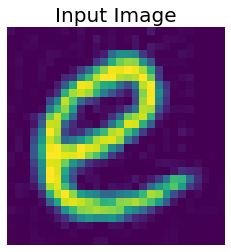

Prediction:  e


In [ ]:
def main():
    img_path = glob.glob('/content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/EMNIST/Demo/img/emnist/*.jpg')[random.randint(1,len(glob.glob('/content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/EMNIST/Demo/img/emnist/*.jpg'))-1)]
    img = Image.open(img_path)
    plt.imshow(np.asarray(img.rotate(-90).transpose(Image.FLIP_LEFT_RIGHT)))
    plt.axis('off')
    plt.title("Input Image", fontsize = 20)
    plt.show()
    img = transforms.ToTensor()(img).cuda()
    model = model_root().cuda().eval()
    model.load_state_dict(torch.load('/content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/EMNIST/Models/emnist_root.pth'))
    print("Prediction: ", demo(model, img, torch.device("cuda")))

if __name__== "__main__":
        main()


#3. SVHN Dataset

## 3.0 Grouper

In [6]:
%cd /content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/SVHN/SoftmaxOutput/

/content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/SVHN/SoftmaxOutput


In [7]:
!python grouper.py

root: 
[0]
[1, 7]
[2]
[3, 5, 8, 6]
[4]
[9]


##3.1 Run the Training

In [ ]:
%cd /content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/SVHN/Train/

/content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/SVHN/Train


In [ ]:
!python svhn_root.py

Using downloaded and verified file: ../dataSVHN/extra_32x32.mat
tcmalloc: large alloc 1631641600 bytes == 0x6420000 @  0x7fe641b5f1e7 0x4d30a0 0x5dede2 0x7fe5b9d2b19a 0x7fe5b9d4abe6 0x7fe5b9d56159 0x7fe5b9d4c5af 0x7fe5b9d549fb 0x7fe5b9d4a6d1 0x4f9336 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x55cd91 0x5d8941 0x4997c7 0x55d078 0x5d8941 0x5da107 0x586de6 0x5d8cdf 0x55ea20 0x5d8868 0x4990ca 0x55cd91 0x55d743 0x642630
Using downloaded and verified file: ../dataSVHN/train_32x32.mat
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 32, 32, 32]           4,640
       BatchNorm2d-5           [-1, 32, 32, 32]              64
              ReLU-6           [-1, 32, 32, 32]

In [ ]:
!python svhn_1.py

Using downloaded and verified file: ../dataSVHN/extra_32x32.mat
tcmalloc: large alloc 1631641600 bytes == 0x787a000 @  0x7fe5bfd651e7 0x4d30a0 0x5dede2 0x7fe537f3119a 0x7fe537f50be6 0x7fe537f5c159 0x7fe537f525af 0x7fe537f5a9fb 0x7fe537f506d1 0x4f9336 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x55cd91 0x5d8941 0x4997c7 0x55d078 0x5d8941 0x5da107 0x586de6 0x5d8cdf 0x55ea20 0x5d8868 0x4990ca 0x55cd91 0x55d743 0x642630
Using downloaded and verified file: ../dataSVHN/train_32x32.mat
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 32, 32, 32]           4,640
       BatchNorm2d-5           [-1, 32, 32, 32]              64
              ReLU-6           [-1, 32, 32, 32]

In [ ]:
!python svhn_3.py

Using downloaded and verified file: ../dataSVHN/extra_32x32.mat
tcmalloc: large alloc 1631641600 bytes == 0x7b0a000 @  0x7fc742dc81e7 0x4d30a0 0x5dede2 0x7fc6baf9419a 0x7fc6bafb3be6 0x7fc6bafbf159 0x7fc6bafb55af 0x7fc6bafbd9fb 0x7fc6bafb36d1 0x4f9336 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x55cd91 0x5d8941 0x4997c7 0x55d078 0x5d8941 0x5da107 0x586de6 0x5d8cdf 0x55ea20 0x5d8868 0x4990ca 0x55cd91 0x55d743 0x642630
Using downloaded and verified file: ../dataSVHN/train_32x32.mat
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 32, 32, 32]           4,640
       BatchNorm2d-5           [-1, 32, 32, 32]              64
              ReLU-6           [-1, 32, 32, 32]

##3.2 Run the Inference

In [ ]:
%cd /content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/SVHN/Test/
!python test_svhn.py

/content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/SVHN/Test
Using downloaded and verified file: ../dataSVHN/extra_32x32.mat
tcmalloc: large alloc 1631641600 bytes == 0x6288000 @  0x7f2fce3951e7 0x4d30a0 0x5dede2 0x7f2f4656119a 0x7f2f46580be6 0x7f2f4658c159 0x7f2f465825af 0x7f2f4658a9fb 0x7f2f465806d1 0x4f9336 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x55cd91 0x5d8941 0x4997c7 0x55d078 0x5d8941 0x5da107 0x586de6 0x5d8cdf 0x55ea20 0x5d8868 0x4990ca 0x55cd91 0x55d743 0x642630
Using downloaded and verified file: ../dataSVHN/train_32x32.mat
Val:  0.9829081041728713


##3.3 Demo

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision import models
from torch.autograd import Variable
from torch.utils.data.sampler import SubsetRandomSampler
import time
import numpy as np
import shutil
import os
import argparse
from PIL import Image
import matplotlib.pyplot as plt
import glob
import os, random

In [ ]:
m = nn.Softmax()

cfg = {
    'root': [16, 32, 32,'M'],
    '2': [16, 'M', 32, 'M', 'D'],
    '3': [32, 64, 'M', 'D'],
    '1': [32, 32, 'M', 'D'],
    '5': [16, 32, 'M', 32, 32, 'M', 64,'D'],
    '6': [16, 32, 32, 'M', 64, 64, 128, 'M', 'D'],
}

In [ ]:
class model(nn.Module):
    def __init__(self, size):
        super(model, self).__init__()
        self.features = self._make_layers(cfg[size])
        self.classifier = nn.Sequential(
                        nn.Linear(32*16*16, 6),
                )

    def forward(self, x):
        y = self.features(x)
        x = y.view(y.size(0), -1)
        out = self.classifier(x)
        return y,out

    def _make_layers(self, cfg, channels = 3):
        layers = []
        in_channels = channels
        for x in cfg:
            if x == 'D':
                layers += [nn.Dropout()]
            elif x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1), nn.BatchNorm2d(x), nn.ReLU(inplace=True)]
                in_channels = x
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers)

def model_root():
    return model('root')

class mod_one(nn.Module):
    def __init__(self, size):
        super(mod_one, self).__init__()
        self.features = self._make_layers(cfg[size], 32)
        self.classifier = nn.Sequential(
                        nn.Linear(32*8*8, 2),
                )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        out = self.classifier(x)
        return x,out

    def _make_layers(self, cfg, channels = 3):
        layers = []
        in_channels = channels
        for x in cfg:
            if x == 'D':
                layers += [nn.Dropout()]
            elif x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1), nn.BatchNorm2d(x), nn.ReLU(inplace=True)]
                in_channels = x
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers)

def model_1():
    return mod_one('1')

class mod_three(nn.Module):
    def __init__(self, size):
        super(mod_three, self).__init__()
        self.features = self._make_layers(cfg[size], 32)
        self.classifier = nn.Sequential(
                        nn.Linear(64*8*8, 4),
                )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        out = self.classifier(x)
        return x,out

    def _make_layers(self, cfg, channels = 3):
        layers = []
        in_channels = channels
        for x in cfg:
            if x == 'D':
                layers += [nn.Dropout()]
            elif x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1), nn.BatchNorm2d(x), nn.ReLU(inplace=True)]
                in_channels = x
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers)

def model_3():
    return mod_three('3')

In [ ]:
leaves = {"root": [0,2,4,9], "root_3":[0,1,2,3], "root_1": [0,1]}
mapper = {"root": {0:0,2:2,4:4,9:9}, "root_3":{0:3,1:5,2:8,3:6}, "root_1": {0:1,1:7}}
def is_leaf(path, output):
    if output in leaves[path]:
        return True
    return False

def find_category(path, leaf):
    return mapper[path][leaf]

In [ ]:
models = {"root_3": model_3(), "root_1": model_1()}
model_name = {"root_3": "../Models/svhn_3.pth", "root_1": "../Models/svhn_1.pth"}

def fetch_model(path):
    model = models[path].cuda().eval()
    model.load_state_dict(torch.load(model_name[path]))
    return model
    

In [ ]:
def demo(model, img, device):
    parent = "root"
    path = "root"
    next_data, root_out = model(img.view(1,img.shape[0], img.shape[1], img.shape[2]))
    root_out = root_out.max(1, keepdim=True)[1]
    if is_leaf(path, root_out.item()):
            return find_category(path, root_out.item())
    parent = str(root_out.item())
    
    while(1): 
        path = path + "_" + parent
        model = fetch_model(path)
        model = model.eval()
        next_data, model_out = model(next_data)
        model_out = model_out.max(1, keepdim=True)[1]
        if is_leaf(path, model_out.item()):
            return find_category(path, model_out.item())
        parent = str(model_out.item())

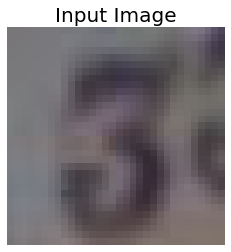

Prediction:  3


In [ ]:
def main():
    img_path = glob.glob('/content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/SVHN/Demo/img/svhn/*.jpg')[random.randint(1,len(glob.glob('/content/gdrive/MyDrive/ACLab/006 Project/MNN_Tree/SVHN/Demo/img/svhn/*.jpg'))-1)]
    img = Image.open(img_path)
    plt.imshow(np.asarray(img))
    plt.axis('off')
    plt.title("Input Image", fontsize = 20)
    plt.show()
    img = transforms.ToTensor()(img).cuda()
    model = model_root().cuda().eval()
    model.load_state_dict(torch.load('../Models/svhn_root.pth'))
    print("Prediction: ", demo(model, img, torch.device("cuda")))

if __name__== "__main__":
        main()